# Scattering by two GNP in random orientations using MSTM
## Evaluate the near field scattreing property of one sphere

## Load modules 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
%matplotlib inline

## Orientation setup  in MSTM input file 
### input
- incident_or_target_frame:Integer switch, relevant only for fixed orientation calculations.
- fixed_or_random_orientation: 0: fixed, 1: random
- incident_azimuth_angle_deg: The azimuth angle $\alpha$ of the incident field propagation direction, relative
to the sphere cluster coordinate system, in degrees (0.0).
- incident_polar_angle_deg: Polar angle $\beta$ for propagation direction, degrees (0.0).
- target_euler_angles_deg: 0.0d0,0.0d0,0.0d0

**I will start with random orientation. The calculation with a fixed orientation would require the precise knowledge of the target frame, and the rotation of the incident light and particles. That will be considered later on.**

### output

- The extinction, scattering, and absorption efficiencies for each of the sphere surface are outputed
- The total extinction, scattering, and absorption efficiencies of the target, for unpolarized incident
radiation and defined with respect to the volume–mean radius, and the asymmetry parameter.

**Make clear which output we are looking at. Just after analyzing the following results, I found that the results are with respect of one sphere surface in a two sphere system. We will discuss the result with respect to the total volume mean radius in the next study.**

## Two spheres in random orientation

In [3]:
#read data of wavelength, n, k, x1, xn, xd
[nv2, kv2, wv2, dv2, nkd]=pickle.load(open("../data/gold_nk.pkl", "rb" ))
nkd.shape

## single sphere
[nv2, kv2, wv2, dv2, datav]=pickle.load(open("../data/gold_mie.pkl", "rb" ))
[qextv,qscav, qabsv, qbackv,gv]=datav

In [4]:
def compare_mie(qextv, qextv2, wv2, dv2, ylabel, scale='log',title1='One sphere', title2='Two spheres', title3='One-Two'):
    num_plots=len(dv2)
    nd=len(dv2)
    
    colormap = plt.cm.gist_ncar
    plt.figure(figsize=(9,3))
    
    ax=plt.subplot(131)
    ax.set_yscale(scale)
    plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, num_plots))))

    plt.plot(wv2,qextv)
    plt.ylabel(ylabel)
    plt.xlabel("Wavelength(nm)")
    plt.title(title1)
    
    ax=plt.subplot(132)
    ax.set_yscale(scale)
    plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, num_plots))))

    plt.plot(wv2,qextv2)
    plt.xlabel("Wavelength(nm)")
    plt.title(title2)
    
    plt.subplot(133)
    #ax.set_yscale(scale)
    plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, num_plots))))

    plt.plot(wv2,qextv-qextv2)
    #for j in range(nd):
    #    tmp=plt.plot(wv2,(qextv-qextv2)[:,j], label=str(dv2[j])+'nm')

    plt.title(title3)
    plt.xlabel("Wavelength(nm)")
    #plt.legend(bbox_to_anchor=(1.3,1.2),title="Diameter")
        
    #plt.plot(wv2,qextv2)
    plt.tight_layout()

The first test results in wrong dimension of particle radius. After correct the script with the last radius size extended by half step size. All is good

### sphere center distance=2*radius (two spheres touch)

(-3, 3)

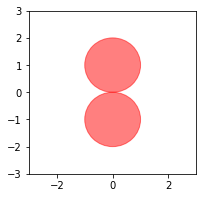

In [5]:
fig=plt.figure(figsize=(3,3))
ax = plt.subplot(111) # note we must use plt.subplots, not plt.subplot


circle1 = plt.Circle((0, 1), 1, color='r',clip_on=False, alpha=0.5)
circle2 = plt.Circle((0, -1), 1, color='r',clip_on=False, alpha=0.5)

# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()

ax.add_artist(circle1)
ax.add_artist(circle2)
plt.xlim(-3,3)
plt.ylim(-3,3)
#fig.savefig('plotcircles.png')

In [6]:
pd1=pd.read_csv("../data/t02_2pd1.summary",delim_whitespace=True)
pd1=pd1[pd1.sphere=='1'].astype('float')
pd1.info()

nwv=len(nkd)
qextv2=pd1['Qext'].values.reshape(nwv, -1)
qscav2=pd1['Qsca'].values.reshape(nwv, -1)
qabsv2=pd1['Qabs'].values.reshape(nwv, -1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 0 to 2198
Data columns (total 12 columns):
sphere       750 non-null float64
host         750 non-null float64
ka           750 non-null float64
x-x(host)    750 non-null float64
y-y(host)    750 non-null float64
z-z(host)    750 non-null float64
Re(m)        750 non-null float64
Im(m)        750 non-null float64
Qext         750 non-null float64
Qsca         750 non-null float64
Qabs         750 non-null float64
Qabs(V)      750 non-null float64
dtypes: float64(12)
memory usage: 76.2 KB


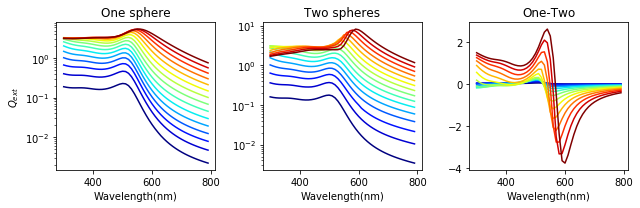

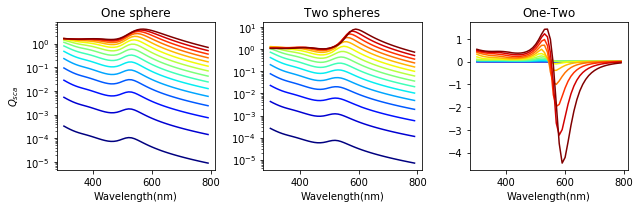

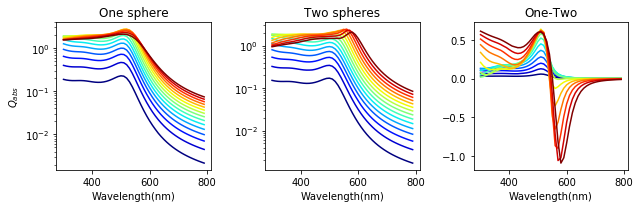

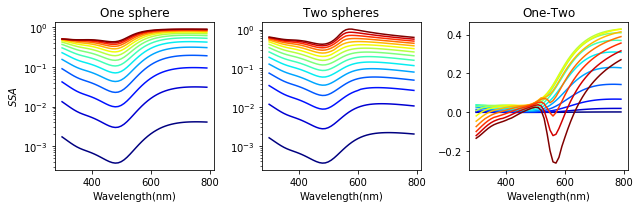

In [7]:
compare_mie(qextv,qextv2, wv2,dv2, ylabel="$Q_{ext}$")
compare_mie(qscav,qscav2, wv2,dv2, ylabel="$Q_{sca}$")
compare_mie(qabsv,qabsv2, wv2,dv2, ylabel="$Q_{abs}$")
compare_mie(qscav/qextv,qscav2/qextv2, wv2,dv2, ylabel="$SSA$")

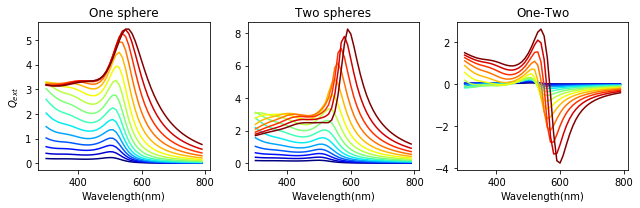

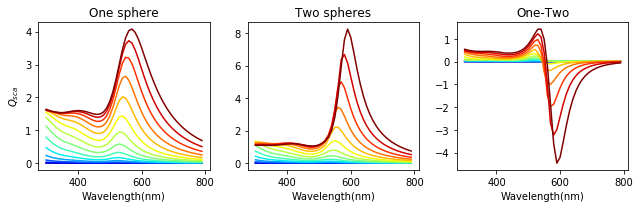

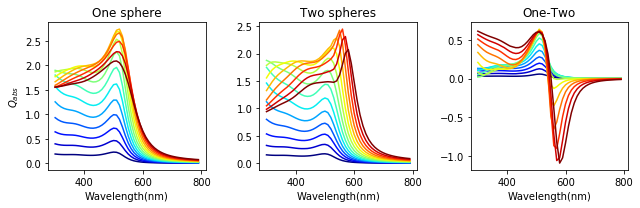

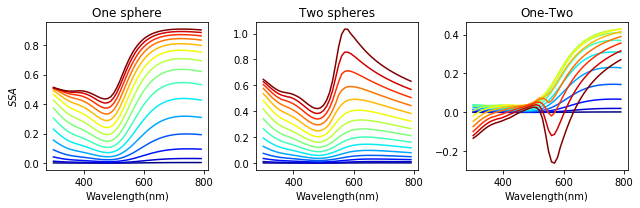

In [8]:
compare_mie(qextv,qextv2, wv2,dv2, ylabel="$Q_{ext}$",scale='linear')
compare_mie(qscav,qscav2, wv2,dv2, ylabel="$Q_{sca}$",scale='linear')
compare_mie(qabsv,qabsv2, wv2,dv2, ylabel="$Q_{abs}$",scale='linear')
compare_mie(qscav/qextv,qscav2/qextv2, wv2,dv2, ylabel="$SSA$",scale='linear')

### sphere center distance=4*radius (two spheres not touch)

(-3, 3)

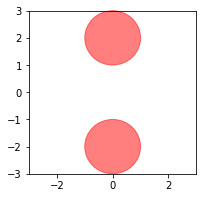

In [64]:
fig=plt.figure(figsize=(3,3))
ax = plt.subplot(111) # note we must use plt.subplots, not plt.subplot


circle1 = plt.Circle((0, 2), 1, color='r',clip_on=False, alpha=0.5)
circle2 = plt.Circle((0, -2), 1, color='r',clip_on=False, alpha=0.5)

# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()

ax.add_artist(circle1)
ax.add_artist(circle2)
plt.xlim(-3,3)
plt.ylim(-3,3)
#fig.savefig('plotcircles.png')

In [10]:
pd1=pd.read_csv("../data/t02_2pd2.summary",delim_whitespace=True)
pd1=pd1[pd1.sphere=='1'].astype('float')
pd1.info()

nwv=len(nkd)
qextv2=pd1['Qext'].values.reshape(nwv, -1)
qscav2=pd1['Qsca'].values.reshape(nwv, -1)
qabsv2=pd1['Qabs'].values.reshape(nwv, -1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 0 to 2198
Data columns (total 12 columns):
sphere       750 non-null float64
host         750 non-null float64
ka           750 non-null float64
x-x(host)    750 non-null float64
y-y(host)    750 non-null float64
z-z(host)    750 non-null float64
Re(m)        750 non-null float64
Im(m)        750 non-null float64
Qext         750 non-null float64
Qsca         750 non-null float64
Qabs         750 non-null float64
Qabs(V)      750 non-null float64
dtypes: float64(12)
memory usage: 76.2 KB


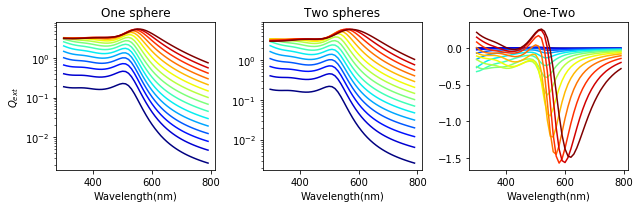

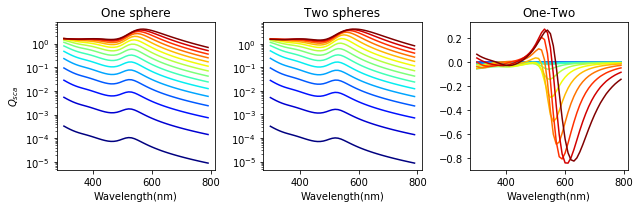

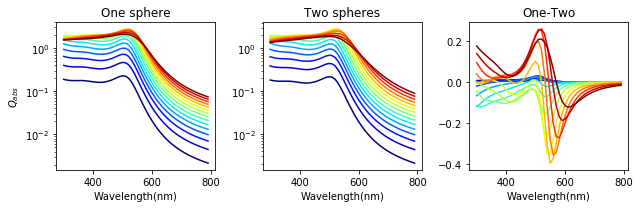

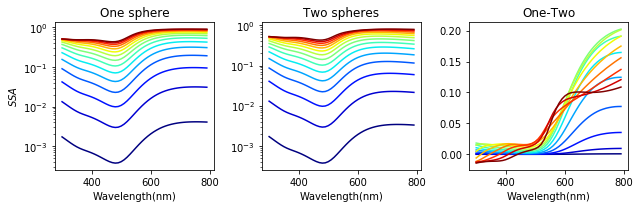

In [13]:
compare_mie(qextv,qextv2, wv2,dv2, ylabel="$Q_{ext}$")
compare_mie(qscav,qscav2, wv2,dv2, ylabel="$Q_{sca}$")
compare_mie(qabsv,qabsv2, wv2,dv2, ylabel="$Q_{abs}$")
compare_mie(qscav/qextv,qscav2/qextv2, wv2,dv2, ylabel="$SSA$")

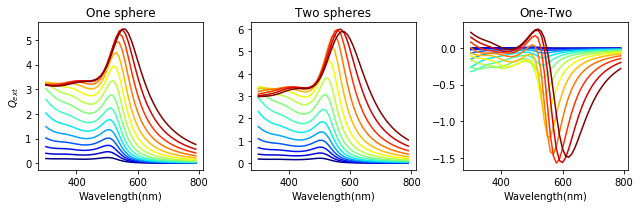

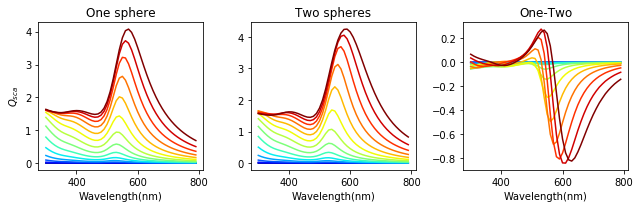

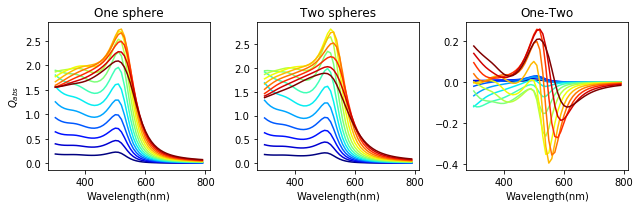

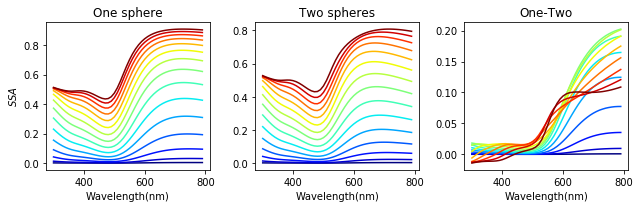

In [12]:
compare_mie(qextv,qextv2, wv2,dv2, ylabel="$Q_{ext}$",scale='linear')
compare_mie(qscav,qscav2, wv2,dv2, ylabel="$Q_{sca}$",scale='linear')
compare_mie(qabsv,qabsv2, wv2,dv2, ylabel="$Q_{abs}$",scale='linear')
compare_mie(qscav/qextv,qscav2/qextv2, wv2,dv2, ylabel="$SSA$",scale='linear')